<a href="https://colab.research.google.com/github/kb107/CNN-Architectures/blob/main/LeNet-5/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np 
from tensorflow import keras
import sklearn
import pandas as pd
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = tf.expand_dims(X_train, axis=3)
X_test = tf.expand_dims(X_test, axis=3)
X_train.shape

TensorShape([60000, 28, 28, 1])

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_valid = X_train[:6000]
y_valid = y_train[:6000]
X_train = X_train[6000:]
y_train = y_train[6000:]
X_valid.shape

TensorShape([6000, 28, 28, 1])

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [8]:
y_valid.shape

(6000, 10)

In [11]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.0.206.162:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.0.206.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.0.206.162:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

with tpu_strategy.scope():
  model = Sequential([Conv2D(filters=6, kernel_size=5, strides=1, 
                            padding='same', activation='tanh',
                            input_shape=X_train[0].shape),
                      
                      AveragePooling2D(pool_size=2, strides=2),
                      
                      Conv2D(filters=16, kernel_size=5, strides=1, 
                            activation='tanh'),
                      
                      AveragePooling2D(pool_size=2, strides=2),
                      
                      Conv2D(filters=120, kernel_size=5, strides=1, 
                            activation='tanh'),
                      
                      Flatten(),

                      Dense(units=120, activation='tanh'),

                      Dense(units=84, activation='tanh'),

                      Dense(units=10, activation='softmax')
                      ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               1

In [14]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                    epochs=50, callbacks=[early_stop])

Epoch 1/50
1688/1688 [==============================] - 31s 15ms/step - loss: 0.2498 - accuracy: 0.9244 - val_loss: 0.1013 - val_accuracy: 0.9715
Epoch 2/50
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0952 - accuracy: 0.9704 - val_loss: 0.0741 - val_accuracy: 0.9780
Epoch 3/50
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0646 - accuracy: 0.9803 - val_loss: 0.0579 - val_accuracy: 0.9835
Epoch 4/50
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0583 - val_accuracy: 0.9828
Epoch 5/50
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.0660 - val_accuracy: 0.9823


In [15]:
losses = pd.DataFrame(history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.249830,0.924444,0.101267,0.971500
1,0.095209,0.970352,0.074086,0.978000
2,0.064581,0.980259,0.057924,0.983500
3,0.050293,0.984241,0.058345,0.982833
4,0.040042,0.987778,0.065970,0.982333


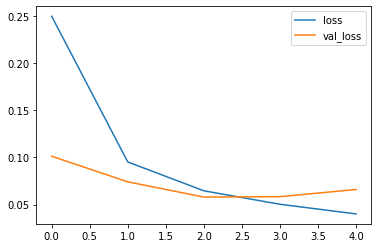

In [16]:
losses[['loss', 'val_loss']].plot()

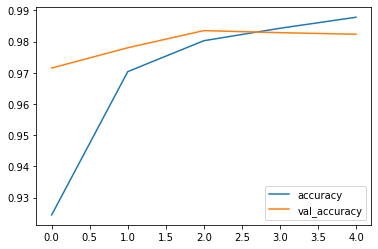

In [17]:
losses[['accuracy', 'val_accuracy']].plot()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
classes=to_categorical(np.argmax(predictions,axis=1))
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.98      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



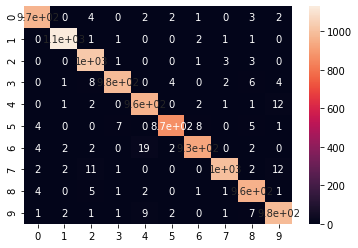

In [19]:
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), classes.argmax(axis=1)), annot=True)